In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from pytest import approx

In [2]:
label = 'truncated and filled with zeros'
ref_file = 'data/GGHO_2023.05.30_THZ1_0001.txt'
sample_file = 'data/GGHO_2023.05.30_THZ1_0032.txt'

In [3]:
def plot_my_freq_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], np.real(complex_array)[0:last], 'xr', label='real')
    plt.plot(freqs[0:last], -1.0 * np.imag(complex_array)[0:last], 'xb', label='imag')
    # plt.plot(freqs[0:last], np.abs(complex_array)[0:last], 'xg', label='abs')
    plt.legend()
    plt.grid()
    plt.show()

In [4]:
ref = np.loadtxt(fname=ref_file, delimiter=' ')
sample = np.loadtxt(fname=sample_file, delimiter=' ')
for i in range(501, 1000):
    ref[i][1] = 0.
    ref[i][2] = 0.
    sample[i][1] = 0.
    sample[i][2] = 0.

Text(0.5, 1.0, 'truncated and filled with zeros ref data, columns 1 and 2, against column 0')

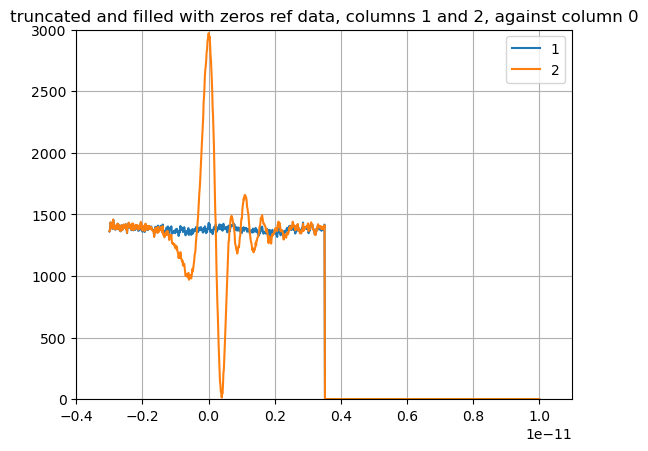

In [5]:
plt.plot(ref[:, 0], ref[:, 1], label=str(1))
plt.plot(ref[:, 0], ref[:, 2], label=str(2))
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((0, 3000))
plt.title(label + ' ref data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'truncated and filled with zeros sample data, columns 1 and 2, against column 0')

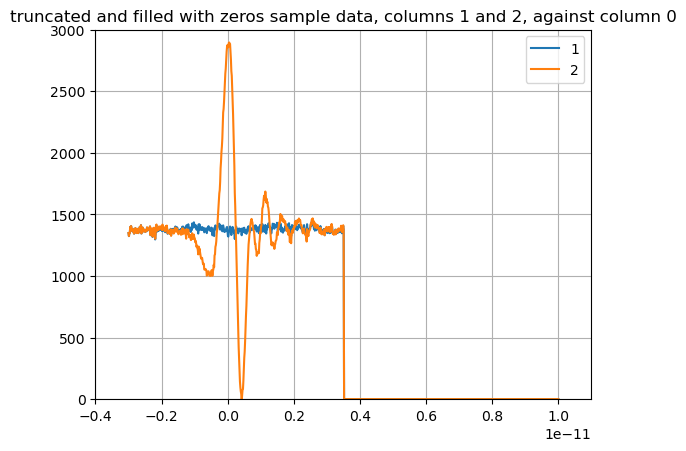

In [6]:
plt.plot(sample[:, 0], sample[:, 1], label=str(1))
plt.plot(sample[:, 0], sample[:, 2], label=str(2))
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((0, 3000))
plt.title(label + ' sample data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'truncated and filled with zeros data, columns 2 - 1, against column 0')

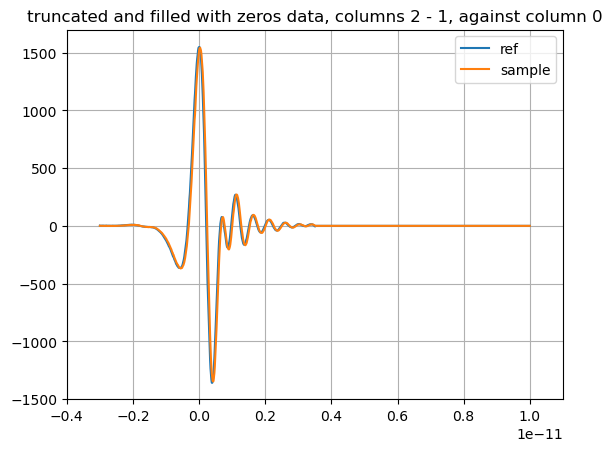

In [7]:
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1], label="ref")
plt.plot(sample[:, 0], sample[:, 2] - sample[:, 1], label="sample")
plt.legend()
plt.grid()
plt.xlim((-0.4e-11, 1.1e-11))
plt.ylim((-1500, 1700))
plt.title(label + ' data, columns 2 - 1, against column 0')

In [8]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref)
xf = fftfreq(N, T)

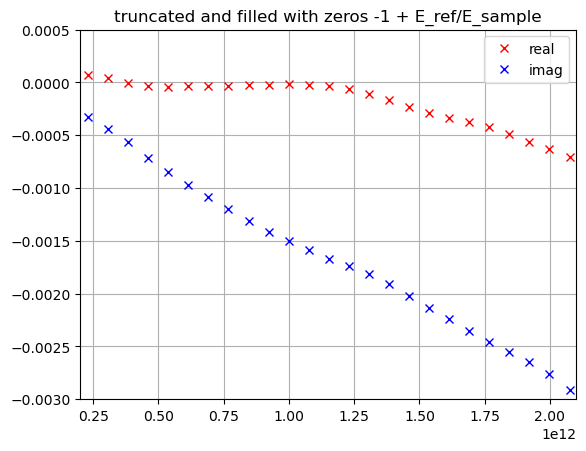

In [9]:
result = 0.007965 * ((fft(ref[:, 2] - ref[:, 1]) / fft(sample[:, 2] - sample[:, 1])) -1.)
plt.xlim((0.2e12, 2.1e12))
plt.ylim((-.003, .0005))
plt.title(label + ' -1 + E_ref/E_sample')
plot_my_freq_array(xf, result, half=True)